# 과제
아래 가이드에 따라 고객별 연간 구매데이터를 생성하고 아래사항을 수행하기(관측치 1,000개)

## 1. 데이터 생성

In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime 
import time
import seaborn as sns
import matplotlib.pyplot as plt

### 1) 고객 데이터 생성

In [2]:
np.random.seed(1)

#1 고객별 속성 데이터프레임 만들기

cusno=np.arange(1001,2001) #고객번호

gender=np.random.choice([0,1],size=1000) # 성별

age=np.random.randint(10,80,size=1000) # 나이 : 주문고객 10세 ~ 79세 (70대)

distance=np.random.uniform(0,3,size=1000) # 반경 : 반경 15 km 이내 주문 가능

In [3]:
#2 배열-> 시리즈
# 고객 정보(데이터) 생성
cusno=pd.Series(cusno)
gender=pd.Series(gender)
age=pd.Series(age)
distance=pd.Series(distance)

#3 데이터프레임 만들기
customer=pd.concat([cusno,gender,age,distance],axis=1)

#4 컬럼명 지정
customer.columns=['cusno','gender','age','distance']

customer.head()

,cusno,gender,age,distance
0,1001,1,14,2.321749
1,1002,1,19,1.002829
2,1003,0,10,0.266995
3,1004,0,31,0.554717
4,1005,1,31,1.580556


###  2) 거래 데이터 생성

In [4]:
np.random.seed(1)
# 거래번호
tano=random.sample(range(10001,20001), 10000)
#1. 고객번호(cusno) 생성
cusno=np.random.randint(1001,2001,size=10000)      #기존 cusno가 중복될 수 있도록 만들기

#2. 건별 거래량(quantity) 데이터 생성 

 ###디폴트 인사이트 : 거래량 가중치 조정###
li = []
for i in range(1,31):               # 치킨 마리수에 따른 가중치 부여.1~30마리
    if i == 1 :
        for j in range(400): # 40.0%
            li.append(i)
    elif i== 2 :
        for j in range(200): # 20.0%
            li.append(i)
    elif i == 3 :
        for j in range(150): # 15.0%
            li.append(i)
    elif i < 6 :
        for j in range(75): # 15.0% 
            li.append(i)
    elif i < 11 :
        for j in range(10): #  5.0% 
            li.append(i)
    elif i < 21 :
        for j in range(2): # 2.0%
            li.append(i)
    else :
        for j in range(1): # 3.0%
            li.append(i)
            
quantity =np.random.choice(li,size=10000)


In [5]:
#3. 데이터프레임 생성

sr_cusno = pd.Series(cusno)
sr_quantity = pd.Series(quantity)
sr_tano = pd.Series(tano)
purchase = pd.concat([sr_tano,sr_cusno,sr_quantity],axis=1)
purchase = purchase.rename(columns={0:'tano',1:'cusno',2:'quantity'})

purchase.head()
# 고객번호별 거래량

,tano,cusno,quantity
0,11054,1038,1
1,16637,1236,1
2,13008,1909,1
3,19804,1073,3
4,12788,1768,19


In [6]:
#4. 생성 된 데이터프레임에 빈 컬럼 추가 : 제품별 거래량
    
purchase['menu_A'] = pd.Series(np.zeros(10000))
purchase['menu_B'] = pd.Series(np.zeros(10000))
purchase['menu_C'] = pd.Series(np.zeros(10000))
purchase['menu_D'] = pd.Series(np.zeros(10000))
purchase['menu_E'] = pd.Series(np.zeros(10000))

purchase.head(3)

,tano,cusno,quantity,menu_A,menu_B,menu_C,menu_D,menu_E
0,11054,1038,1,0.0,0.0,0.0,0.0,0.0
1,16637,1236,1,0.0,0.0,0.0,0.0,0.0
2,13008,1909,1,0.0,0.0,0.0,0.0,0.0


In [7]:
#5. 건별 거래량(quantity)을 제품별 거래량(manu_A~E)에 배분
order = []
menu = ['menu_A','menu_B','menu_C','menu_D','menu_E']
np.random.seed(1)
for i in range(len(purchase.quantity)):
    order.append(np.random.choice(menu,purchase.quantity[i]).tolist())

# 위에서는 치킨 1~30마리를 설정하면서 고객거래 데이터중에 총 수량에 0마리가 없도록 설정했다면
# 이건 거꾸로 총 수량을 정해두고 메뉴를 넣어서 최소 하나의 메뉴는 고르도록 설정

for i in range(len(order)):  
    for j in order[i]:
        if j == 'menu_A':
            purchase.loc[i,'menu_A'] += 1
        elif j == 'menu_B':
            purchase.loc[i,'menu_B'] += 1
        elif j == 'menu_C':
            purchase.loc[i,'menu_C'] += 1
        elif j == 'menu_D':
            purchase.loc[i,'menu_D'] += 1
        else :
            purchase.loc[i,'menu_E'] += 1

purchase

,tano,cusno,quantity,menu_A,menu_B,menu_C,menu_D,menu_E
0,11054,1038,1,0.0,0.0,0.0,1.0,0.0
1,16637,1236,1,0.0,0.0,0.0,0.0,1.0
2,13008,1909,1,1.0,0.0,0.0,0.0,0.0
3,19804,1073,3,1.0,1.0,0.0,1.0,0.0
4,12788,1768,19,2.0,5.0,4.0,1.0,7.0
...,...,...,...,...,...,...,...,...
9995,17309,1685,2,0.0,0.0,1.0,0.0,1.0
9996,19245,1249,26,7.0,2.0,5.0,6.0,6.0
9997,18622,1534,3,1.0,0.0,0.0,2.0,0.0
9998,16737,1990,3,0.0,2.0,0.0,1.0,0.0


In [8]:
#6. 거래액 합계(amount) 컬럼 추가 : 제품별 가격 반영
purchase['amount'] = (purchase['menu_A']*18000 
                      + purchase['menu_B']*19000 
                      + purchase['menu_C']*20000 
                      + purchase['menu_D']*20000 
                      + purchase['menu_E']*19000)

#7. 평균 거래가(price) 컬럼 추가
purchase['price'] = round(purchase.amount / purchase.quantity,2)
purchase.head(3)

,tano,cusno,quantity,menu_A,menu_B,menu_C,menu_D,menu_E,amount,price
0,11054,1038,1,0.0,0.0,0.0,1.0,0.0,20000.0,20000.0
1,16637,1236,1,0.0,0.0,0.0,0.0,1.0,19000.0,19000.0
2,13008,1909,1,1.0,0.0,0.0,0.0,0.0,18000.0,18000.0


In [9]:
#8. 날짜 데이터 추가
    
# 날짜(date)
date_list=list(pd.date_range('2020-01-01','2021-12-31',freq='D'))     #랜덤 선택을 위한 date 리스트

purchase['date']=np.random.choice(date_list,size=10000)

# 요일(day)
purchase['day']=purchase['date'].apply(lambda x: x.weekday())         #date별 요일을 숫자로 나타냄
purchase['day']=purchase['day'].replace(list(range(7)),['Mon','Tue','Wed','Thr','Fri','Sat','Sun'])
                                                    # 그래프로 볼때 보기 편하게 영어로 재변경
# 시간(time) : 영업시간 오전 11시 ~ 라스트오더 23시 추가?
# purchase['time']=np.random.randint(11,24,size=10000)

purchase.head(3)

,tano,cusno,quantity,menu_A,menu_B,menu_C,menu_D,menu_E,amount,price,date,day
0,11054,1038,1,0.0,0.0,0.0,1.0,0.0,20000.0,20000.0,2020-08-08,Sat
1,16637,1236,1,0.0,0.0,0.0,0.0,1.0,19000.0,19000.0,2020-01-17,Fri
2,13008,1909,1,1.0,0.0,0.0,0.0,0.0,18000.0,18000.0,2021-05-07,Fri


## 3) 고객데이터 + 판매데이터 : 공통 변수 cusno를 활용해 데이터 결합

In [10]:
df=pd.merge(purchase,customer,on='cusno',how='outer')
df.head(5)

,tano,cusno,quantity,menu_A,menu_B,menu_C,menu_D,menu_E,amount,price,date,day,gender,age,distance
0,11054,1038,1,0.0,0.0,0.0,1.0,0.0,20000.0,20000.00,2020-08-08,Sat,0,43,2.767513
1,19602,1038,1,0.0,0.0,1.0,0.0,0.0,20000.0,20000.00,2021-06-17,Thr,0,43,2.767513
2,17505,1038,3,0.0,1.0,1.0,1.0,0.0,59000.0,19666.67,2020-01-14,Tue,0,43,2.767513
3,17132,1038,1,1.0,0.0,0.0,0.0,0.0,18000.0,18000.00,2021-11-12,Fri,0,43,2.767513
4,14324,1038,1,0.0,0.0,0.0,0.0,1.0,19000.0,19000.00,2021-05-24,Mon,0,43,2.767513


In [11]:
# 데이터 정렬
df = df.reindex(columns=['date','day','menu_A','menu_B','menu_C','menu_D','menu_E',
                         'quantity','price','amount','cusno','gender','age','distance'])
df.head()

,date,day,menu_A,menu_B,menu_C,menu_D,menu_E,quantity,price,amount,cusno,gender,age,distance
0,2020-08-08,Sat,0.0,0.0,0.0,1.0,0.0,1,20000.00,20000.0,1038,0,43,2.767513
1,2021-06-17,Thr,0.0,0.0,1.0,0.0,0.0,1,20000.00,20000.0,1038,0,43,2.767513
2,2020-01-14,Tue,0.0,1.0,1.0,1.0,0.0,3,19666.67,59000.0,1038,0,43,2.767513
3,2021-11-12,Fri,1.0,0.0,0.0,0.0,0.0,1,18000.00,18000.0,1038,0,43,2.767513
4,2021-05-24,Mon,0.0,0.0,0.0,0.0,1.0,1,19000.00,19000.0,1038,0,43,2.767513


# 2. 데이터 요약정보 및 현황 파악

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      10000 non-null  datetime64[ns]
 1   day       10000 non-null  object        
 2   menu_A    10000 non-null  float64       
 3   menu_B    10000 non-null  float64       
 4   menu_C    10000 non-null  float64       
 5   menu_D    10000 non-null  float64       
 6   menu_E    10000 non-null  float64       
 7   quantity  10000 non-null  int32         
 8   price     10000 non-null  float64       
 9   amount    10000 non-null  float64       
 10  cusno     10000 non-null  int32         
 11  gender    10000 non-null  int32         
 12  age       10000 non-null  int32         
 13  distance  10000 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int32(4), object(1)
memory usage: 1015.6+ KB


In [13]:
df.describe()

,menu_A,menu_B,menu_C,menu_D,menu_E,quantity,price,amount,cusno,gender,age,distance
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.595300,0.591200,0.595200,0.598300,0.576700,2.956700,19202.521686,56775.50000,1498.757000,0.474400,45.589800,1.502920
std,0.976838,0.980091,0.966763,1.002516,0.959692,3.496291,582.509128,67149.19509,290.724837,0.499369,20.212501,0.863900
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18000.000000,18000.00000,1001.000000,0.000000,10.000000,0.003099
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19000.000000,20000.00000,1246.000000,0.000000,29.000000,0.752885
50%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,19062.500000,38000.00000,1494.000000,0.000000,46.000000,1.507185
75%,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,19666.670000,59000.00000,1752.000000,1.000000,63.000000,2.247842
max,10.000000,12.000000,10.000000,12.000000,10.000000,30.000000,20000.000000,580000.00000,2000.000000,1.000000,79.000000,2.995797


In [14]:
# 거리(distance) 범주화(dclass)
df['dclass'] = df.distance.apply(np.ceil)

#  나이(age) 범주화(generation)
df['generation'] = (df.age//10)*10

# 날짜(date)로부터 년(Y), 월(M), 일(D) 컬럼 생성 
df['Y'] = df['date'].dt.year
df['M'] = df['date'].dt.month
df['D'] = df['date'].dt.day

df.head(3)

,date,day,menu_A,menu_B,menu_C,menu_D,menu_E,quantity,price,amount,cusno,gender,age,distance,dclass,generation,Y,M,D
0,2020-08-08,Sat,0.0,0.0,0.0,1.0,0.0,1,20000.00,20000.0,1038,0,43,2.767513,3.0,40,2020,8,8
1,2021-06-17,Thr,0.0,0.0,1.0,0.0,0.0,1,20000.00,20000.0,1038,0,43,2.767513,3.0,40,2021,6,17
2,2020-01-14,Tue,0.0,1.0,1.0,1.0,0.0,3,19666.67,59000.0,1038,0,43,2.767513,3.0,40,2020,1,14


### Before 인사이트1) 연령대별 판매량 

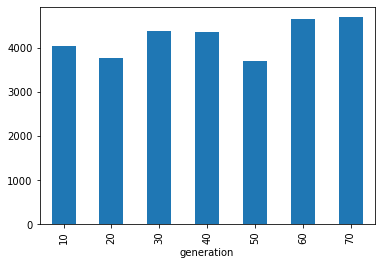

In [15]:
bf1 = df.groupby('generation').sum()['quantity']   # 연령대별 거래량 총합
BF1 = bf1.plot(kind='bar')

### Before 인사이트 2) 월별 판매량

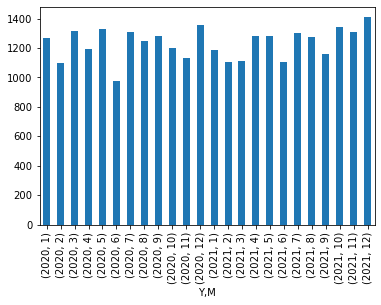

In [16]:
bf2 = df.groupby(['Y','M'])
BF2 = bf2['quantity'].sum().plot(kind='bar')

### Before 인사이트 3) 주중, 주말 판매량

In [17]:
# 평일/주말 before데이터
bf_3 = df.set_index('date').groupby(lambda date:date.dayofweek).sum()['quantity']
bf_3

date
0    4042
1    4129
2    4125
3    4238
4    4238
5    4379
6    4416
Name: quantity, dtype: int32

In [18]:
Day_week=np.array(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
Day_week

array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], dtype='<U3')

In [19]:
bf_3.index=Day_week[bf_3.index]

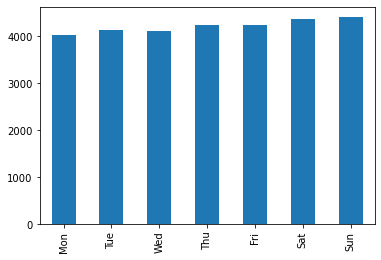

In [20]:
BF3 =bf_3.plot(kind='bar')

# 3. 인사이트 설정 : df2

In [21]:
df2 = df.copy()

In [22]:
df2.head(3)

,date,day,menu_A,menu_B,menu_C,menu_D,menu_E,quantity,price,amount,cusno,gender,age,distance,dclass,generation,Y,M,D
0,2020-08-08,Sat,0.0,0.0,0.0,1.0,0.0,1,20000.00,20000.0,1038,0,43,2.767513,3.0,40,2020,8,8
1,2021-06-17,Thr,0.0,0.0,1.0,0.0,0.0,1,20000.00,20000.0,1038,0,43,2.767513,3.0,40,2021,6,17
2,2020-01-14,Tue,0.0,1.0,1.0,1.0,0.0,3,19666.67,59000.0,1038,0,43,2.767513,3.0,40,2020,1,14


### 인사이트 1) 연령별 거래 빈도 조정

In [23]:
age_li = []
for i in range(10,80):
    if i < 20 :
        for j in range(200): # 20세 미만 20%
            age_li.append(i)
    elif i< 30 :
        for j in range(270): # 30세 미만 27%
            age_li.append(i)
    elif i < 40 :
        for j in range(240): # 40세 미만 24%
            age_li.append(i)
    elif i < 50 :
        for j in range(120): # 50세 미만 12%
            age_li.append(i)
    elif i < 60 :
        for j in range(90): # 60세 미만 9%
            age_li.append(i)
    elif i < 70 :
        for j in range(50): #  70세 미만 5%
            age_li.append(i)
    else :
        for j in range(30): # 70세 이상 3%
            age_li.append(i)
        
age=np.random.choice(age_li,size=1000)
customer['age'] = age
customer['generation'] = (customer['age']//10)*10

In [24]:
customer.age.describe()

count    1000.000000
mean       33.676000
std        15.704766
min        10.000000
25%        22.000000
50%        31.000000
75%        42.000000
max        79.000000
Name: age, dtype: float64

### 인사이트 2) 21년도 조류독감 발생으로 인한 거래 감소

In [25]:
date_li = []
for i in pd.date_range('2020-01-01','2021-12-31',freq='D'):
    if i in pd.date_range('2020-01-01','2020-03-31',freq='D') :
        for j in range(9): 
            date_li.append(i)
    elif i in pd.date_range('2020-04-01','2020-06-30',freq='D') :
        for j in range(10): 
            date_li.append(i)
    elif i in pd.date_range('2020-07-01','2020-09-30',freq='D') :
        for j in range(11): 
            date_li.append(i)
    elif i in pd.date_range('2020-10-01','2020-12-31',freq='D') :
        for j in range(10): 
            date_li.append(i)
    elif i in pd.date_range('2021-01-01','2021-03-31',freq='D') :
        for j in range(11): 
            date_li.append(i)
    elif i in pd.date_range('2021-04-01','2021-06-30',freq='D') :
        for j in range(6): 
            date_li.append(i)
    elif i in pd.date_range('2021-07-01','2021-09-30',freq='D') :   # 3분기부터 점진적 회복세
        for j in range(7): 
            date_li.append(i)
    else :
        for j in range(9): 
            date_li.append(i)

### 인사이트 3) 평일/주간 거래 빈도 조정

In [26]:
## 주말 거래 빈도 조정 ######
weekend_fri = pd.date_range('2020-01-01','2021-12-31',freq='W-FRI')
weekend_sat = pd.date_range('2020-01-01','2021-12-31',freq='W-SAT')
weekend_sun = pd.date_range('2020-01-01','2021-12-31',freq='W-SUN')

for i in range(4):
    date_li.extend(weekend_fri)
    date_li.extend(weekend_sat)
    date_li.extend(weekend_sun)

In [27]:
purchase['date']=np.random.choice(date_li,size=10000)

In [28]:
df2=pd.merge(purchase,customer,on='cusno',how='outer')

In [29]:
# 날짜(date) 파생 컬럼 수정
df2['Y'] = df2['date'].dt.year
df2['M'] = df2['date'].dt.month
df2['D'] = df2['date'].dt.day
df2['day']=df2['date'].apply(lambda x: x.weekday())         #date별 요일을 숫자로 나타냄
df2['day']=df2['day'].replace(list(range(7)),['Mon','Tue','Wed','Thr','Fri','Sat','Sun'])

In [30]:
df2.head(3)

,tano,cusno,quantity,menu_A,menu_B,menu_C,menu_D,menu_E,amount,price,date,day,gender,age,distance,generation,Y,M,D
0,11054,1038,1,0.0,0.0,0.0,1.0,0.0,20000.0,20000.00,2020-09-19,Sat,0,61,2.767513,60,2020,9,19
1,19602,1038,1,0.0,0.0,1.0,0.0,0.0,20000.0,20000.00,2021-01-28,Thr,0,61,2.767513,60,2021,1,28
2,17505,1038,3,0.0,1.0,1.0,1.0,0.0,59000.0,19666.67,2021-03-19,Fri,0,61,2.767513,60,2021,3,19


In [31]:
df2.sort_values(by='cusno') 

,tano,cusno,quantity,menu_A,menu_B,menu_C,menu_D,menu_E,amount,price,date,day,gender,age,distance,generation,Y,M,D
6391,19439,1001,1,0.0,1.0,0.0,0.0,0.0,19000.0,19000.0,2021-11-02,Tue,1,47,2.321749,40,2021,11,2
6389,14440,1001,1,0.0,1.0,0.0,0.0,0.0,19000.0,19000.0,2021-02-16,Tue,1,47,2.321749,40,2021,2,16
6388,11178,1001,1,0.0,0.0,0.0,1.0,0.0,20000.0,20000.0,2020-01-03,Fri,1,47,2.321749,40,2020,1,3
6387,16508,1001,1,0.0,0.0,1.0,0.0,0.0,20000.0,20000.0,2021-03-16,Tue,1,47,2.321749,40,2021,3,16
6386,19010,1001,5,1.0,1.0,3.0,0.0,0.0,97000.0,19400.0,2020-07-21,Tue,1,47,2.321749,40,2020,7,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,14095,2000,1,0.0,1.0,0.0,0.0,0.0,19000.0,19000.0,2021-09-26,Sun,0,39,0.956808,30,2021,9,26
1029,10343,2000,4,1.0,1.0,2.0,0.0,0.0,77000.0,19250.0,2020-09-21,Mon,0,39,0.956808,30,2020,9,21
1028,15971,2000,1,0.0,1.0,0.0,0.0,0.0,19000.0,19000.0,2020-03-16,Mon,0,39,0.956808,30,2020,3,16
1038,15915,2000,2,1.0,0.0,0.0,1.0,0.0,38000.0,19000.0,2021-08-16,Mon,0,39,0.956808,30,2021,8,16


### 인사이트 4) 배달비 인상으로 인한  매출 감소 
- 인상시점 : 21년도 이후
- distance가 2 이상인 거래건 감소

In [32]:
over2 = list(df2.loc[(df2.distance>2)&(df2.Y==2021), 'tano'])
# 21년도 반경 3킬로인 사람들

In [33]:
len(over2)

1440

In [34]:
df2.set_index('tano', inplace=True)

for i in random.sample(over2, 700):
    df2.drop(index=i, inplace=True)

df2.reset_index(inplace=True)

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9300 entries, 0 to 9299
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tano        9300 non-null   int64         
 1   cusno       9300 non-null   int32         
 2   quantity    9300 non-null   int32         
 3   menu_A      9300 non-null   float64       
 4   menu_B      9300 non-null   float64       
 5   menu_C      9300 non-null   float64       
 6   menu_D      9300 non-null   float64       
 7   menu_E      9300 non-null   float64       
 8   amount      9300 non-null   float64       
 9   price       9300 non-null   float64       
 10  date        9300 non-null   datetime64[ns]
 11  day         9300 non-null   object        
 12  gender      9300 non-null   int32         
 13  age         9300 non-null   int32         
 14  distance    9300 non-null   float64       
 15  generation  9300 non-null   int32         
 16  Y           9300 non-nul

# 3. 인사이트 적용 확인 : df3

### After 인사이트 1) 연령대별 거래 확인
- 고연령대 대비 저연령대 거래가 높은 것을 확인

In [36]:
df3 = df2.copy()
df3.head(2)

,tano,cusno,quantity,menu_A,menu_B,menu_C,menu_D,menu_E,amount,price,date,day,gender,age,distance,generation,Y,M,D
0,11054,1038,1,0.0,0.0,0.0,1.0,0.0,20000.0,20000.0,2020-09-19,Sat,0,61,2.767513,60,2020,9,19
1,19602,1038,1,0.0,0.0,1.0,0.0,0.0,20000.0,20000.0,2021-01-28,Thr,0,61,2.767513,60,2021,1,28


In [37]:
gr = df3.groupby('Y') # gr : 연도별 그룹화

In [38]:
df3_20 = gr.get_group(2020) # 20년지표
df3_21 = gr.get_group(2021) # 21년지표

In [39]:
gr_20 = df3_20.groupby('generation') # gr_20 : 20년지표의 연령대별 데이터
gr_21 = df3_21.groupby('generation') # gr_21 : 21년지표의 연령대별 데이터

In [40]:
a=gr_20.agg({'quantity':'sum','amount':'sum'}) # 연령대별 총거래량 및 총사용금액
b=gr_21.agg({'quantity':'sum','amount':'sum'})

In [41]:
a = a.rename(columns={'quantity':'qnt20','amount':'amt20'})
b = b.rename(columns={'quantity':'qnt21','amount':'amt21'})

In [42]:
df_4 = pd.merge(a,b,on='generation', how='inner')

In [43]:
df_4['sales'] = np.where(df_4.amt20 < df_4.amt21,1,0)# 20년대비 21년 거래량/금액 비교

In [44]:
df_4

,qnt20,amt20,qnt21,amt21,sales
generation,,,,,
10,2892,55453000.0,2176,41757000.0,0
20,4291,82465000.0,3134,60183000.0,0
30,4309,82778000.0,3393,65119000.0,0
40,1831,35116000.0,1059,20350000.0,0
50,1412,27105000.0,1081,20770000.0,0
60,669,12852000.0,513,9862000.0,0
70,519,9967000.0,338,6515000.0,0


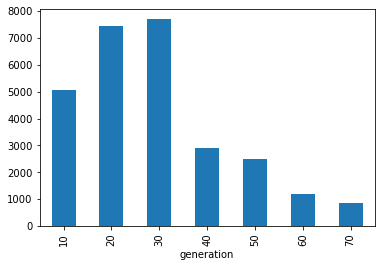

In [45]:
af1 = df3.groupby('generation').sum()['quantity']
AF1 = af1.plot(kind='bar') # 연령대별 거래 확인

In [ ]:
ㅁ

### After 인사이트2) 월별 거래량 확인

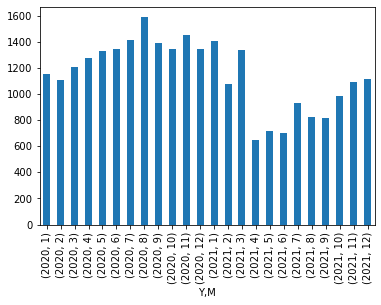

In [46]:
af2 = df3.groupby(['Y','M'])
AF2 = af2['quantity'].sum().plot(kind='bar') # 21.4 조류독감 파동 후 점진적 회복세

### After 인사이트3) 요일별 거래량 확인
- 평일(월 ~ 목) 대비 주말(금 ~ 일) 거래량이 많은 것을 확인

In [47]:
# date 인덱스로 요일별 거래량 확인 = af3
af3 = df3.set_index('date').groupby(lambda date:date.dayofweek).sum()['quantity']

In [48]:
af3

date
0    3324
1    3672
2    3380
3    3174
4    4626
5    4884
6    4506
Name: quantity, dtype: int32

In [49]:
Day_week=np.array(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
Day_week

array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], dtype='<U3')

In [50]:
af3.index=Day_week[af3.index]

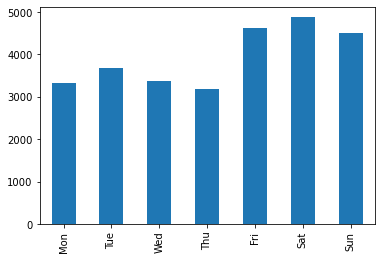

In [51]:
AF3 = af3.plot(kind='bar')

# 5. 구매감소 고객 예측 모델을 생성하기 위한 데이터 셋

In [52]:
#1. 고객별 연간 거래데이터 생성
data_20 = df3_20.groupby('cusno')
data_21 = df3_21.groupby('cusno')

In [53]:
df_20=data_20.agg({'quantity':'sum','amount':'sum'})
df_21=data_21.agg({'quantity':'sum','amount':'sum'})
df_20 = df_20.rename(columns={'quantity':'qnt20','amount':'amt20'})
df_21 = df_21.rename(columns={'quantity':'qnt21','amount':'amt21'})

In [54]:
model = pd.merge(df_20,df_21,on='cusno', how='inner')
model = pd.merge(model, customer,on='cusno', how='inner')
model = model.reindex(columns=['cusno','age','gender','distance','qnt20','amt20','qnt21','amt21'])
model['sales'] = np.where(model.amt20 < model.amt21,1,0)
model # 고객의 기본정보

,cusno,age,gender,distance,qnt20,amt20,qnt21,amt21,sales
0,1001,47,1,2.321749,8,156000.0,7,138000.0,0
1,1002,73,1,1.002829,13,249000.0,13,248000.0,0
2,1003,32,0,0.266995,17,327000.0,18,343000.0,1
3,1004,37,0,0.554717,34,655000.0,38,726000.0,1
4,1005,33,1,1.580556,5,98000.0,8,156000.0,1
...,...,...,...,...,...,...,...,...,...
953,1996,23,0,1.216672,18,345000.0,8,156000.0,0
954,1997,17,0,0.225098,15,293000.0,3,58000.0,0
955,1998,27,0,2.584057,11,212000.0,9,176000.0,0
956,1999,28,0,1.557893,16,309000.0,12,233000.0,0


# 6. 예측 모델 검증 및 평가
-  최적의 구매감소 고객 예측 모델링을 위한 변수 선택 및 파생 변수 생성

In [55]:
# 독립변수, 종속변수 분리
from sklearn.model_selection import train_test_split

# 독립변수
X = model[['age','gender','distance']] # X : 연령, 성별, 거리별 확인
# 종속변수
y = model['sales'] # Y : 작년 대비 올해 사용금액 확인

# 학습용 테이터와 평가용 데이터를 8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, \
                                                    random_state=10) 

# train 학습을 위한 데이터
# test 테스트 용도


print(X_train.shape)
print(X_test.shape)


(766, 3)
(192, 3)


In [56]:
# Decision Tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print(dt_pred[0:10])
print(y_test.values[0:10])

accuracy = accuracy_score(y_test, dt_pred)
print('dt 예측 정확도 :', accuracy)


[0 1 0 0 1 0 1 1 0 1]
[0 0 1 0 0 1 1 0 1 1]
dt 예측 정확도 : 0.6354166666666666


In [57]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print('rf 예측 정확도 :', rf_accuracy)

rf 예측 정확도 : 0.59375


In [58]:
# Logistic Regression
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
print('lr 예측 정확도 :', accuracy)


lr 예측 정확도 : 0.6354166666666666


- 결론

- 다양한 상황을 부여하고 의미를 찾으려 했으나 생각만큼 값이 잘 나오지 않음
- 데이터에 변동을 주었을때 그나마 값이 있던 것은 반경이었음. 거리가 멀수록 덜 시켜먹음
- 나머지는 원본 및 변동시킨 데이터끼리의 상관관계를 찾지 못함

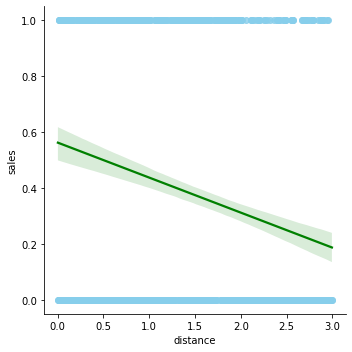

In [59]:
sns.lmplot(x='distance',y='sales', data=model, scatter_kws={'color':'skyblue'}, line_kws={'color':'green'})